# Análisis de la actividad 3: Densidad de ruido espectral
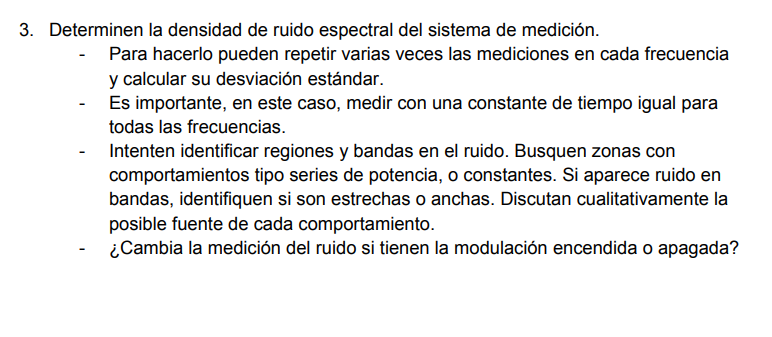

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib widget

R_m   = np.loadtxt('Data_total_datos_y_scripts_medicion/actividad_3/datos/Rmean_p3_fc8_s12_o3.txt')
R_std = np.loadtxt('Data_total_datos_y_scripts_medicion/actividad_3/datos/Rstd_p3_fc8_s12_o3.txt')

T_m   = np.loadtxt('Data_total_datos_y_scripts_medicion/actividad_3/datos/Tmean_p3_fc8_s12_o3.txt')
T_std = np.loadtxt('Data_total_datos_y_scripts_medicion/actividad_3/datos/Tstd_p3_fc8_s12_o3.txt')

frecs = np.logspace(np.log10(40), np.log10(50000), 50, dtype=int)

fig, ax  = plt.subplots(1,2, figsize = (16,7),facecolor = 'white')
ax[0].plot(frecs, R_std[150:])
ax[0].set_xlabel('Frecuencia [Hz]')
ax[0].set_ylabel('Ruido [V]')
ax[0].set_title('Ruido en función de la frecuencia')
ax[0].set_xscale('log')
ax[0].set_yscale('log')

ax[1].plot(frecs, np.log10(R_std[150:]*2/0.1))
ax[1].set_xlabel('Frecuencia [Hz]')
ax[1].set_ylabel('Transferencia del ruido [db]')
# ax[1].set_xscale('log')
# ax[1].set_yscale('log')
#ax[1].set_title('Ruido en función de la frecuencia')

<ipython-input-1-6256698d62ec>:9: UserWarning: loadtxt: Empty input file: "Data_total_datos_y_scripts_medicion/actividad_3/datos/Tstd_p3_fc8_s12_o3.txt"
  T_std = np.loadtxt('Data_total_datos_y_scripts_medicion/actividad_3/datos/Tstd_p3_fc8_s12_o3.txt')


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, 'Transferencia del ruido [db]')

# Mediciones 28/05

In [17]:
R_m  = np.loadtxt('Data_total_datos_y_scripts_medicion/actividad_3/datos_2805/Rmean_p3_fc19_s11_o0.txt')
R_std = np.loadtxt('Data_total_datos_y_scripts_medicion/actividad_3/datos_2805/Rstd_p3_fc19_s11_o0.txt')
R_grande_std = np.loadtxt('Data_total_datos_y_scripts_medicion/actividad_3/datos_2805/Rstd_grande_p3_fc19_s11_o0.txt')

R_std_sin_ref = np.loadtxt('Data_total_datos_y_scripts_medicion/actividad_3/datos_2805/Rstd_p3_fc19_s12_o0_sin_ref.txt')

frecs = np.logspace(np.log10(10), np.log10(50000), 200, dtype=int)
frecs_grande = np.logspace(np.log10(40000), np.log10(100000), 50, dtype=int)
frecs_sin_ref = np.logspace(np.log10(10), np.log10(50000), 50, dtype=int)

x = np.linspace(10,1000,1000)
y =  -7.21706205e-11*x  -4.52760091e-08
y_log = np.log(x)*-2.18793544e-08 + 1.30007172e-07

plt.figure(facecolor ='w')
plt.plot(frecs, R_std, '.')
plt.plot(frecs_grande, R_grande_std, '.')
plt.plot(x,y)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Ruido [V]')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, 'Ruido [V]')

In [33]:
(4.92e-9-1.24e-8)/(270-108)
np.sqrt((4.92e-9-1.24e-8)**2 +  (270-108)**2)
frecs[110]

1108

### Comparacion del Ruido con la señal prendida y apagada

In [3]:
plt.figure(facecolor = 'w')
plt.plot(frecs, R_std, '.', label = 'Señal prendida')
plt.plot(frecs_sin_ref, R_std_sin_ref, '.', label = 'Señal apagada')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Ruido [V]')
plt.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [44]:
from scipy.optimize import curve_fit
def lineal(x, m, b):
    y = m*x + b
    return y
#P0 = [-7.21706205e-11,  4.52760091e-08, 0]
def log(x,m, a):
    y = np.log(x)*m +a
    return y

popt, pcov = curve_fit(lineal, np.log10(R_std[:110]), np.log10(frecs[:110]))
perr = np.sqrt(np.diag(pcov))

popt

array([-1.00620205, -5.93170652])

In [49]:
%matplotlib widget
x = np.linspace(-9, -7, 50)

plt.plot(np.log10(R_std[:110]),np.log10(frecs[:110]) ,'.')
plt.plot(x, popt[0]*x+popt[1])
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

$ \log{R} = A \log(f) + B $ $\Rightarrow$  $e^B f^A = R$ $\Rightarrow$ esto va como $f^{-1}$

In [58]:
x = np.linspace(10, 1000,1000)
A = popt[0]
B = 10**(popt[1])
y =  B * (x**A)

plt.figure(facecolor ='w')
plt.plot(frecs, R_std, '.')
plt.plot(frecs_grande, R_grande_std, '.')
plt.plot(x,y)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Ruido [V]')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, 'Ruido [V]')